2025/12/09
By Li.Jiahao

I will start learning algorithms learning from query algorithms, because they provide a simple and very useful framework for explaining quantum algorithm techniques. I will systematically introduce the query model starting with Deutsch's algorithm.

# 1.Query model
What's the query model?
Classical computation often resembles an assembly line: It starts with an input, undergoes a step-by-step computation and ends at the output. However, the query model doesn't focus on the inner computation process.Instead, You can only obtain the output by asking a black box.
We use a simple mathematical model to represent the question:$ f:\Sigma^n \to \Sigma^m$. We provide a input consisting of x ($x \in \Sigma^n$),and the oracle(black box) produce the output f(x)($f(x)\in \Sigma^m$).
Here are some simple examples explaining query problems:
* OR Function: Determine Whether there exist an $x\in \Sigma^n$ such that f(x)=1.($ f:\Sigma^n \to \Sigma$)
* Minimun Finding: Find the index of $x\in \Sigma^n$ corresponding to the minimun value in the dataset $f(x) \in\Sigma^m$.

Next, I will explain why quantum computation solves this kind of problem faster than classical computation.






# 2.Deutsch's algorithm
David Deutsch was the first proposed the quantum algorithm that demonstrated an instinct advantage over the classical computation ,especially  solving a parity problem for the simple  case n=1.

Consider the follow four function definations:
$$
\begin{array}{c|c}
a & f_1(a) \\
\hline
0 & 0 \\
1 & 0
\end{array}
\quad
\begin{array}{c|c}
a & f_2(a) \\
\hline
0 & 0 \\
1 & 1
\end{array}
\quad
\begin{array}{c|c}
a & f_3(a) \\
\hline
0 & 1 \\
1 & 0
\end{array}
\quad
\begin{array}{c|c}
a & f_4(a) \\
\hline
0 & 1 \\
1 & 1
\end{array}
$$
* Constant functions: Function $f_1$ and $f_4$ always yield a constant result(either always '0' or always '1').
* Balanced functions: Function $f_2$ and $f_3$ output '0' and '1' with equal frqency.

The Promise Problem:
We introduce a constraint known as a promise:Before we are given the function(oracle), we must promise that the function is guaranteed to be either balanced or constant.Simply put, our goal is identify the type of the function.


Regarding the Deutsch's problem: We ask a machine to determine the type of given input function. 
* For a classical machine: To determine the type of the function it must evaluate both inputs (0 and 1). It calculates f(0) and f(1) and compare them,which requires two queries.
* For a quantum machine: It just takes one step if we use the Deutsch's algorithm.

## 2.1 Deutsch's Algorithm Analysis
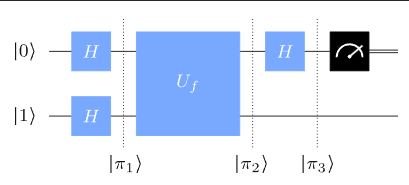

Here is a quantum circuit describing the Deutsch's algorithm.The $U_f$ is the promised oracle, which changes according to the requirement.
In this circuit, the initial state is $|1\rangle|0\rangle$.After applying the H-gate, state evolves into $\pi_1$:
$$
|\pi_1\rangle = |-\rangle|+\rangle = \frac{1}{2}(|0\rangle - |1\rangle)|0\rangle + \frac{1}{2}(|0\rangle - |1\rangle)|1\rangle.
$$
Next, the $U_f$ is performed.It provides a XOR operation on the auxiliary qubit.System evloves into:
$$|\pi_2\rangle = \frac{1}{2}\big(|0 \oplus f(0)\rangle - |1 \oplus f(0)\rangle\big)|0\rangle
+ \frac{1}{2}\big(|0 \oplus f(1)\rangle - |1 \oplus f(1)\rangle\big)|1\rangle.
$$  
We can simplify the XOR formula:
$$|0 \oplus a\rangle - |1 \oplus a\rangle = (-1)^a \big(|0\rangle - |1\rangle\big)
$$

So we obtain the expression of state $|\pi_2\rangle$:
$$
|\pi_2\rangle = (-1)^{f(0)}|-\rangle \left(\frac{|0\rangle + (-1)^{f(0) \oplus f(1)}|1\rangle}{\sqrt{2}}\right)
$$
$$
= \begin{cases}
(-1)^{f(0)}|-\rangle|+\rangle & \text{if } f(0) \oplus f(1) = 0 \\
(-1)^{f(0)}|-\rangle|-\rangle & \text{if } f(0) \oplus f(1) = 1.
\end{cases}
$$
Finally, apply the H-gate to top qubit,and get :
$$
|\pi_3\rangle
= \begin{cases}
(-1)^{f(0)}|-\rangle|0\rangle & \text{if } f(0) \oplus f(1) = 0 \\
(-1)^{f(0)}|-\rangle|1\rangle & \text{if } f(0) \oplus f(1) = 1.
\end{cases}
$$
So, when we measure the top qubit and obtain the outcome '0',it implies the function is constant, otherwise it is balanced .


# 3.Phase Kickback
It's an interesting phenomenon that the $U_f$ is performed on the auxiliary qubit,  we extract the information by measuring input qubit.This relies on a  counter-intuitive mechanism in quantum computation called 'Phase Kickback' . 

Derivation:

Base on the definiton of the oracle,we have:
$$U_f(|b\rangle|a\rangle) = |b \oplus f(a)\rangle|a\rangle = (X^{f(a)}|b\rangle)|a\rangle$$
Especially,when auxiliary qubit is in the state $|-\rangle$,we have:
$$U_f(|-\rangle|a\rangle) = (X^{f(a)}|-\rangle)|a\rangle = (-1)^{f(a)}|-\rangle|a\rangle.$$
We know that $|-\rangle$ is an **eigenstate** of the Pauli-X operator with eigenvalue $-1$ (since $X|-\rangle = -|-\rangle$).
We can intuitively know $|-\rangle$ is an eigenvector of matrix $X$.Actually we apply a unitary operator to the auxiliary qubit, but it generate a phase factor which is "kicked back" to the input qubit.


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def deutsch_function(case : int):
    '''It must satisfy equation Uf∣x⟩∣y⟩=∣x⟩∣y⊕f(x)⟩'''
    '''case 1: f(0)=0, f(1)=0 (constant)
            y⊕f(x)=y⊕0=y
       case 2: f(0)=0, f(1)=1 (balanced)
            if   x=0 , y -> y⊕0 = y 
            else x=1 , y -> y⊕1
        y⊕f(x)=y⊕1
    '''
    if case not in [ 1, 2, 3,4]:
        raise ValueError("Case must be 4, 1, 2, or 3.")
    
    f= QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f


In [ ]:
# then we comlete the circuit
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.
 
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
 
    qc.x(n)
    qc.h(range(n + 1))
 
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
 
    qc.h(range(n))
    qc.measure(range(n), range(n))
 
    return qc
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

In [ ]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.
 
    qc = compile_circuit(function)
 
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

for case in [1, 2, 3, 4]:
    function = deutsch_function(case)
    result = deutsch_algorithm(function)
    print(f"Case {case}: The function is {result}.")    